In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("mako")

In [46]:
dataset = pd.read_csv("data/Leaf_Classification/train.csv")
result = pd.read_csv("data/Leaf_Classification/test.csv")

In [3]:
dataset.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.0

In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.000000,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.000000,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.000000,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.000000,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.000000,0.005859,0.013672,0.029297,0.169920
margin5,990.0,0.014264,0.018390,0.000000,0.001953,0.007812,0.017578,0.111330
margin6,990.0,0.038579,0.052030,0.000000,0.000000,0.015625,0.056153,0.310550
margin7,990.0,0.019202,0.017511,0.000000,0.005859,0.015625,0.029297,0.091797
margin8,990.0,0.001083,0.002743,0.000000,0.000000,0.000000,0.000000,0.031250
margin9,990.0,0.007167,0.008933,0.000000,0.001953,0.005859,0.007812,0.076172


In [5]:
def create_feature_boxplots(prefix, log_scale=False):
    margin_columns = list(filter(lambda x: x.startswith(prefix), map(lambda x: str(x), list(dataset.columns))))    
    df = dataset[margin_columns]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.legend([])
    if log_scale:
        plt.yscale('log')
    plt.xticks(rotation=90)
    
    plt.title(f"Combined Boxplot for 64 {prefix} features")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    
    plt.tight_layout()
    plt.show()

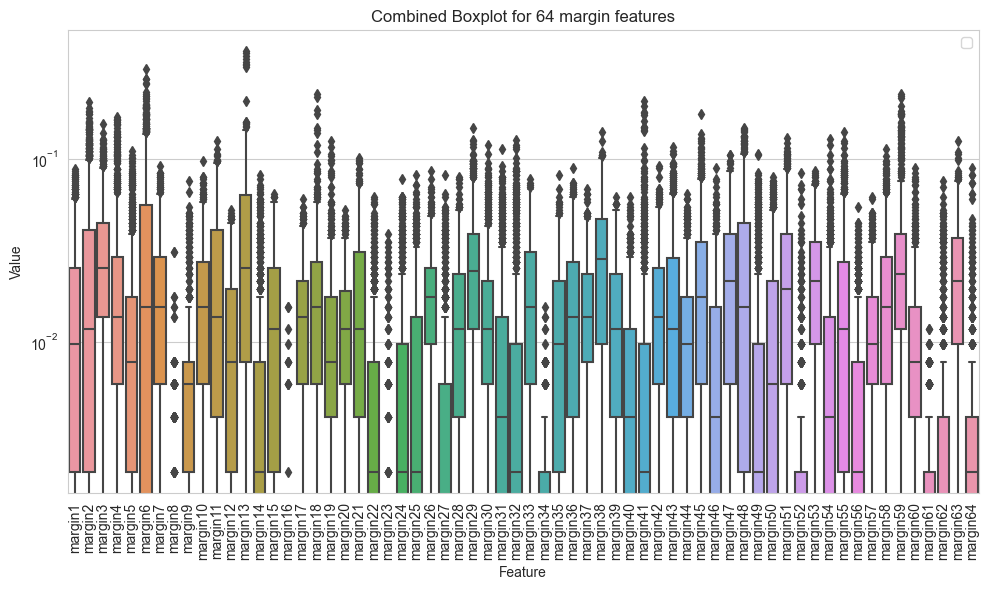

In [6]:
create_feature_boxplots("margin", True)

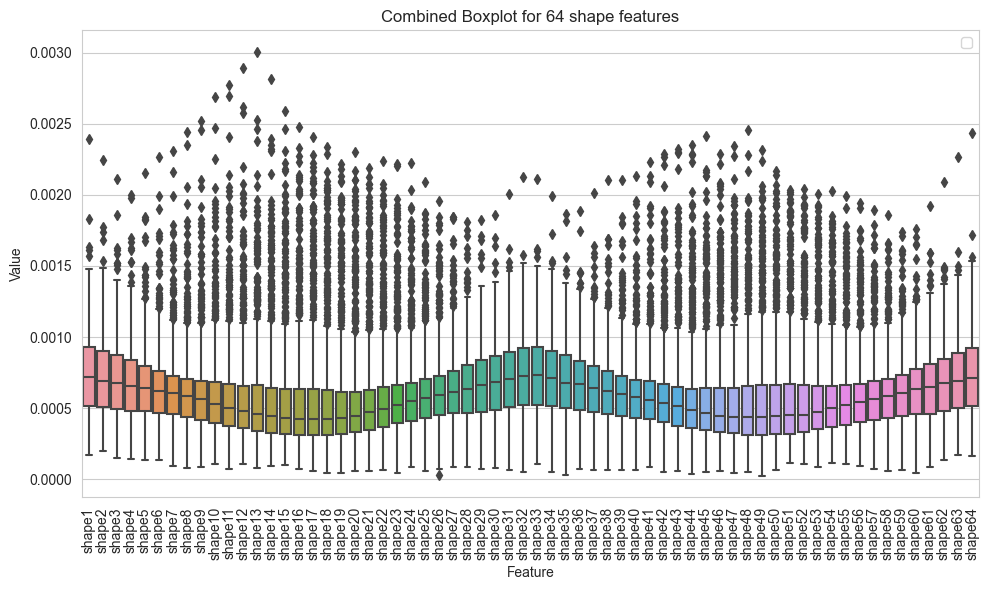

In [7]:
create_feature_boxplots("shape", False)

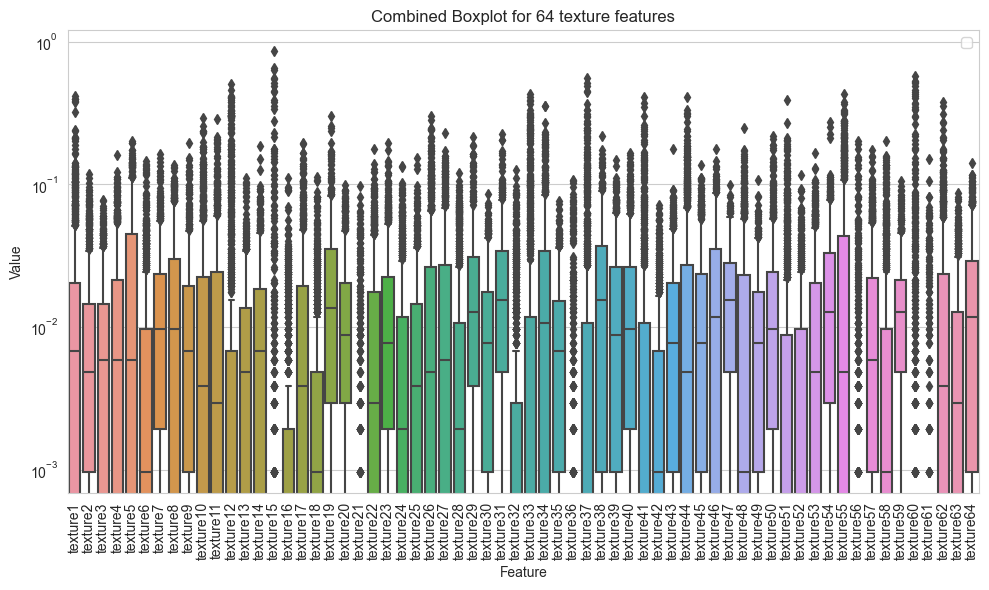

In [8]:
create_feature_boxplots("texture", True)

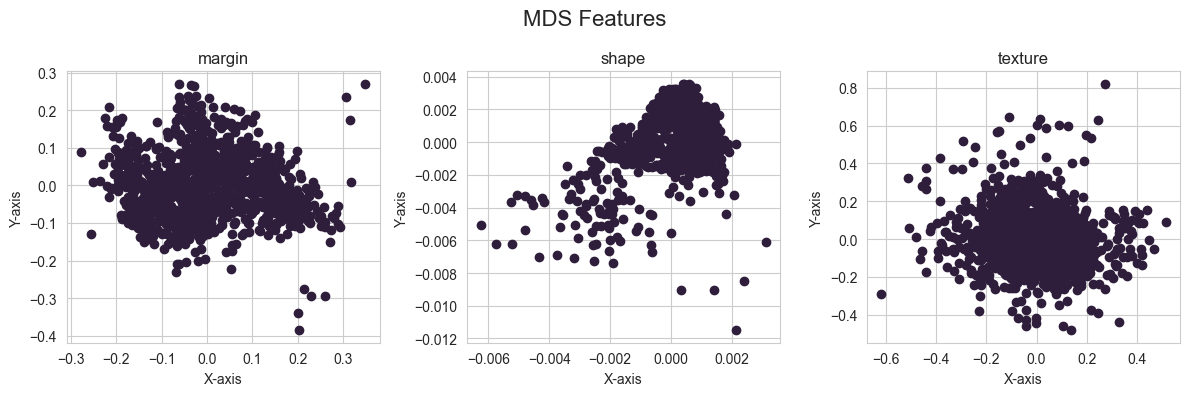

In [9]:
from sklearn import manifold

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.suptitle("MDS Features", fontsize=16)
axes = axes.flatten()

for idx, prefix in enumerate(["margin", "shape", "texture"]):
    margin_columns = list(filter(lambda x: x.startswith(prefix), map(lambda x: str(x), list(dataset.columns))))    
    df = dataset[margin_columns] 
    embedding = manifold.MDS(n_components=2, normalized_stress='auto')
    X_transformed = embedding.fit_transform(df)
    axes[idx].scatter(X_transformed[:, 0], X_transformed[:, 1])
    axes[idx].set_xlabel('X-axis')
    axes[idx].set_ylabel('Y-axis')
    axes[idx].set_title(f'{prefix}')
plt.tight_layout()
plt.show()

In [28]:
import glob
import torch
from torch.utils.data import DataLoader, Dataset
import re
from tqdm import tqdm
from PIL import Image
from torchvision import transforms
import imgaug.augmenters as iaa

#### Create Image Dataset

In [37]:
class ImageDataset(Dataset):
    def __init__(self, mode, X, y, max_width, max_height, scale_width, scale_height):
        self.X = X
        self.y = y
        self.labels = dict(zip(self.y.id, self.y.species))
        self.y.drop(columns="id", inplace=True)
        self.indices = list(self.labels.keys())
        path = "data/Leaf_Classification/images/"
        self.files = [f"{path}{str(idx)}.jpg" for idx in self.indices]
        self.mode = mode
        self.max_width = max_width
        self.max_height = max_height
        self.scale_width = scale_width
        self.scale_height = scale_height
        self.transformations = transforms.Compose([transforms.PILToTensor()])

    def __len__(self):
        return len(self.indices)

    def get_PIL_image(self, idx):
        file = self.files[idx]
        label_idx = self.indices[idx]
        label = self.labels[label_idx]
        image = Image.open(file)

        iaa_transformations = [
            iaa.PadToFixedSize(width=self.max_width, height=self.max_height),
            iaa.Resize({"height": self.scale_height, "width": self.scale_width}),
        ]
        
        if self.mode=="train":
            # add image augmentation
            iaa_transformations.append(iaa.HorizontalFlip(p=0.25))
            iaa_transformations.append(iaa.VerticalFlip(p=0.25))
            iaa_transformations.append(iaa.Rot90((1, 3), keep_size=False))
            
        seq = iaa.Sequential(iaa_transformations)
        image = np.array(image)
        image = seq(images=[image])
        image = np.squeeze(image, axis=0)
        
        return image, label, file

    def get_data(self, idx):
        return self.X.iloc[idx]

    def __getitem__(self, idx):
        image, label, _ = self.get_PIL_image(idx)
        image = self.transformations(image)
        data = self.get_data(idx)
        return image, label, data

#### Create train-test-split

In [77]:
from sklearn import model_selection
X, y = dataset[dataset.columns.difference(['species', 'id'])], dataset[['species', 'id']]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_result, y_result = result[result.columns.difference(['id'])], result[['id']]

In [67]:
X_test.head(5)

,margin1,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin2,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin3,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin4,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin5,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin6,margin60,margin61,margin62,margin63,margin64,margin7,margin8,margin9,shape1,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape2,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape3,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape4,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape5,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape6,shape60,shape61,shape62,shape63,shape64,shape7,shape8,shape9,texture1,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture2,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture3,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture4,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture5,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture6,texture60,texture61,texture62,texture63,texture64,texture7,texture8,texture9
213,0.000000,0.003906,0.025391,0.005859,0.033203,0.013672,0.001953,0.0,0.027344,0.046875,0.027344,0.000000,0.011719,0.005859,0.000000,0.000000,0.000000,0.003906,0.003906,0.001953,0.015625,0.089844,0.037109,0.013672,0.003906,0.001953,0.011719,0.0,0.001953,0.017578,0.023438,0.023438,0.000000,0.099609,0.000000,0.001953,0.037109,0.011719,0.005859,0.082031,0.003906,0.027344,0.000000,0.000000,0.001953,0.005859,0.021484,0.007812,0.007812,0.000000,0.000000,0.000000,0.007812,0.064453,0.083984,0.000000,0.031250,0.000000,0.001953,0.023438,0.003906,0.005859,0.000000,0.009766,0.000733,0.000674,0.000684,0.000730,0.000719,0.000733,0.000744,0.000818,0.000892,0.000890,0.000812,0.000688,0.000752,0.000742,0.000748,0.000743,0.000698,0.000699,0.000726,0.000692,0.000662,0.000674,0.000679,0.000718,0.000686,0.000702,0.000741,0.000781,0.000722,0.000676,0.000681,0.000706,0.000669,0.000700,0.000677,0.000698,0.000664,0.000678,0.000674,0.000661,0.000699,0.000716,0.000771,0.000842,0.000653,0.000843,0.000771,0.000708,0.000676,0.000659,0.000667,0.000703,0.000748,0.000735,0.000718,0.000631,0.000705,0.000725,0.000695,0.000747,0.000775,0.000638,0.000700,0.000689,0.008789,0.002930,0.000977,0.021484,0.000000,0.001953,0.0,0.000000,0.002930,0.000977,0.008789,0.001953,0.011719,0.00000,0.000977,0.013672,0.014648,0.041016,0.001953,0.105470,0.002930,0.008789,0.010742,0.001953,0.010742,0.0,0.00000,0.038086,0.004883,0.0,0.000000,0.018555,0.027344,0.003906,0.013672,0.006836,0.000000,0.039062,0.135740,0.011719,0.024414,0.004883,0.013672,0.000977,0.080078,0.015625,0.0,0.000000,0.002930,0.009766,0.156250,0.0,0.016602,0.000000,0.007812,0.000000,0.0,0.0,0.002930,0.000000,0.038086,0.006836,0.038086,0.005859
331,0.003906,0.035156,0.019531,0.007812,0.011719,0.001953,0.011719,0.0,0.017578,0.021484,0.009766,0.007812,0.019531,0.007812,0.001953,0.009766,0.007812,0.000000,0.025391,0.000000,0.035156,0.048828,0.037109,0.027344,0.011719,0.000000,0.042969,0.0,0.011719,0.023438,0.017578,0.029297,0.005859,0.050781,0.001953,0.058594,0.025391,0.011719,0.015625,0.074219,0.001953,0.007812,0.005859,0.013672,0.009766,0.001953,0.027344,0.001953,0.011719,0.009766,0.009766,0.000000,0.021484,0.023438,0.031250,0.003906,0.033203,0.001953,0.000000,0.015625,0.000000,0.015625,0.000000,0.001953,0.001224,0.000597,0.000532,0.000511,0.00047

In [68]:
X_result.head(5)

,margin1,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin2,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin3,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin4,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin5,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin6,margin60,margin61,margin62,margin63,margin64,margin7,margin8,margin9,shape1,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape2,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape3,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape4,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape5,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape6,shape60,shape61,shape62,shape63,shape64,shape7,shape8,shape9,texture1,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture2,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture3,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture4,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture5,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture6,texture60,texture61,texture62,texture63,texture64,texture7,texture8,texture9
0,0.019531,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.009766,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.078125,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.011719,0.005859,0.003906,0.001953,0.021484,0.025391,0.005859,0.001953,0.023438,0.068359,0.000000,0.003906,0.011719,0.031250,0.001953,0.011719,0.003906,0.007812,0.000000,0.009766,0.003906,0.054688,0.015625,0.000000,0.000000,0.000000,0.052734,0.000000,0.005859,0.0,0.005859,0.000782,0.001393,0.001496,0.001601,0.001679,0.001590,0.001492,0.001398,0.001314,0.001238,0.001186,0.000828,0.001125,0.001070,0.001005,0.000943,0.000886,0.000826,0.000783,0.000741,0.000702,0.000671,0.000876,0.000668,0.000682,0.000705,0.000736,0.000763,0.000805,0.000861,0.000918,0.000979,0.001054,0.000927,0.001132,0.001212,0.001279,0.001364,0.001420,0.001435,0.001436,0.001418,0.001359,0.001284,0.000993,0.001206,0.001134,0.001055,0.001003,0.000941,0.000879,0.000819,0.000762,0.000717,0.000698,0.001060,0.000688,0.000680,0.000695,0.000719,0.000737,0.001123,0.001205,0.001295,0.112310,0.008789,0.006836,0.00000,0.008789,0.008789,0.000000,0.0,0.017578,0.000977,0.025391,0.013672,0.023438,0.0,0.000977,0.023438,0.000000,0.004883,0.000000,0.013672,0.001953,0.045898,0.011719,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.004883,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.010742,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.022461,0.0,0.0,0.000000,0.003906,0.053711,0.055664,0.028320,0.040039
1,0.007812,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.005859,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.064453,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.009766,0.003906,0.001953,0.009766,0.031250,0.001953,0.029297,0.007812,0.037109,0.009766,0.001953,0.003906,0.058594,0.029297,0.001953,0.021484,0.003906,0.005859,0.000000,0.021484,0.015625,0.048828,0.013672,0.000000,0.000000,0.007812,0.029297,0.013672,0.007812,0.0,0.033203,0.000534,0.000414,0.0

In [69]:
y_test.head(5)

,species,id
213,Acer_Pictum,362
331,Quercus_Phillyraeoides,545
501,Acer_Pictum,810
309,Acer_Saccharinum,506
88,Ilex_Aquifolium,155


#### Label Encoding

In [78]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder(sparse_output=False)
y_test = encoder.fit_transform(X=y_test)

In [81]:
pd.DataFrame(y_test).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

#### Feature Standardization

In [57]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_result = pd.DataFrame(scaler.transform(X_result), columns=X_result.columns)

#### Find out max image size

In [41]:
max_width = 0
max_height = 0

all_images = glob.glob("data/Leaf_Classification/images/*")
for img_path in tqdm(all_images):
    img = Image.open(img_path)
    max_width = max(max_width, img.size[0])
    max_height = max(max_height, img.size[1])
print(f"Max width: {max_width}, Max height: {max_height}")

100%|████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:00<00:00, 8315.41it/s]

Max width: 1706, Max height: 1089


In [42]:
train_dataset = ImageDataset(
    X=X_train,
    y=y_train,
    mode="train", 
    max_width=max_width, 
    max_height=max_height, 
    scale_width=256, 
    scale_height=256)

test_dataset = ImageDataset(
    X=X_test,
    y=y_test,
    mode="test", 
    max_width=max_width, 
    max_height=max_height,
    scale_width=256, 
    scale_height=256)

#### Display sample images

In [43]:
def plot_samples_images(rows, cols, dataset, indices):
    fig = plt.figure(figsize=(10, 8))
    for idx, img_idx in enumerate(indices):
        fig.add_subplot(rows, cols, idx+1)
        image, label, file = dataset.get_PIL_image(img_idx)
        file = re.findall(r'\d+', file)[0] + ".jpg"
        plt.imshow(image)
        plt.title(label + "\n" + file)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

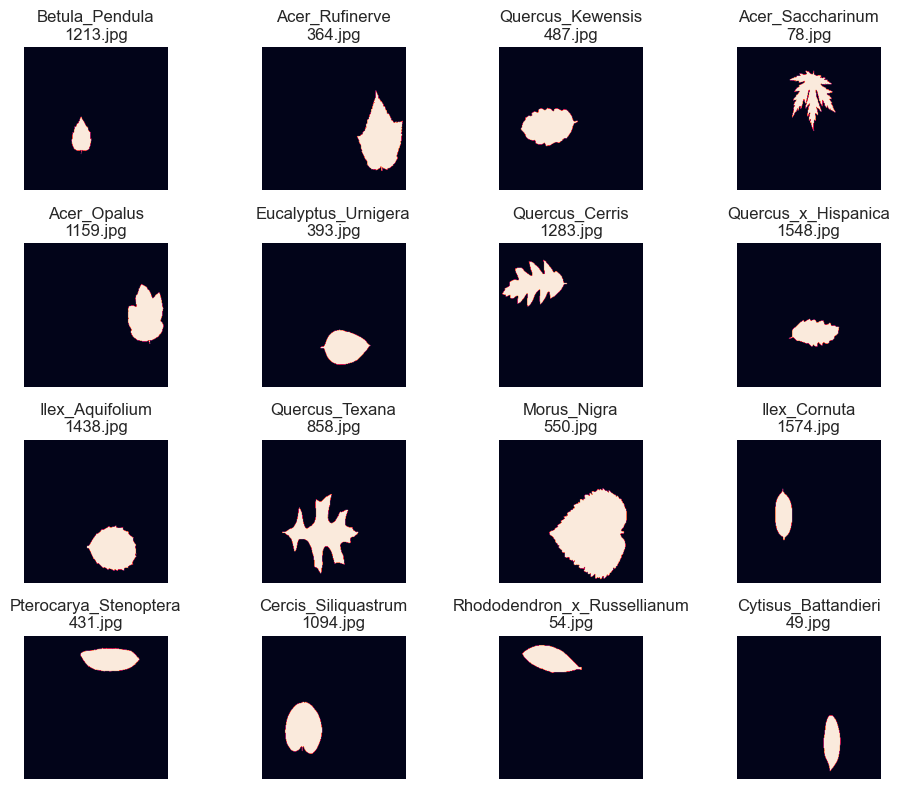

In [44]:
plot_samples_images(4, 4, train_dataset, list(range(0, 16)))